## Step 0: Download Dataset from Kaggle

To train our image classification model, we need a dataset of images. In this example, we will use the "Massive Indian Food Dataset" available on Kaggle. To download this dataset directly into your Colab environment

In [1]:
!kaggle datasets download -d anshulmehtakaggl/themassiveindianfooddataset

Dataset URL: https://www.kaggle.com/datasets/anshulmehtakaggl/themassiveindianfooddataset
License(s): CC0-1.0
100% 726M/726M [00:35<00:00, 22.4MB/s]
100% 726M/726M [00:35<00:00, 21.6MB/s]


### Unzip Dataset
# Run this cell to unzip the downloaded dataset


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/themassiveindianfooddataset.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
import os
for dirpath,dirnames,filenames in os.walk("/content/"):
    print(f"There are {len(dirnames)} Directories and {len(filenames)} Files in '{dirpath}'")

There are 17 Directories and 1 Files in '/content/'
There are 2 Directories and 7 Files in '/content/.config'
There are 1 Directories and 0 Files in '/content/.config/logs'
There are 0 Directories and 6 Files in '/content/.config/logs/2024.07.08'
There are 0 Directories and 1 Files in '/content/.config/configurations'
There are 1 Directories and 0 Files in '/content/dal_resized'
There are 0 Directories and 261 Files in '/content/dal_resized/dal_resized'
There are 1 Directories and 0 Files in '/content/Vadapav-Resized'
There are 0 Directories and 536 Files in '/content/Vadapav-Resized/Vadapav-Resized'
There are 1 Directories and 0 Files in '/content/Kofta-Resized'
There are 0 Directories and 667 Files in '/content/Kofta-Resized/Kofta-Resized'
There are 1 Directories and 0 Files in '/content/Biryani-resize'
There are 0 Directories and 229 Files in '/content/Biryani-resize/resize'
There are 1 Directories and 0 Files in '/content/kathi-resize'
There are 0 Directories and 340 Files in '/con

In [4]:
class_name=[]
#data is not named properly so
resize='size'
resized='sized'

In [5]:
#here taking the class name

for file in os.listdir('/content/'):
  if file.endswith(resize):
    class_name.append(file)
  elif file.endswith(resized):
    class_name.append(file)

In [6]:
class_name

['dal_resized',
 'Vadapav-Resized',
 'Kofta-Resized',
 'Biryani-resize',
 'kathi-resize',
 'Paneer-Tikka-resized',
 'pakora-resize',
 'Naan-Resized',
 'dabeli-resize',
 'Pani-Puri-resize',
 'dosa_resized',
 'Chole-Bhature-Resized',
 'dhokla-resize',
 'Jalebi-Resize',
 'Pav-Bhaji-Resized']

In [7]:
#here directory is named incorrectly for panipuri
os.listdir('/content/Pani-Puri-resize')

['resize']

In [8]:
def copy_images(parent_folder, target_labels,train_ratio=0.7):
    """
    Copies images from `target_labels` classes in `parent_folder` to subdirectories
    named after `dataset` for each target label.

    Args:
        parent_folder (str): Path to the parent folder containing the image dataset.
        dataset (str): "train" or "test" indicating which dataset to copy from.
        target_labels (list): List of target labels (class names) to copy.

    Returns:
        None
    """
    image_paths = []
    for label in target_labels:
      if label not in ['Pani-Puri-resize', 'Biryani-resize']:
        # Create subdirectory if it doesn't exist
        target_dir = os.path.join('INDIAN_FOOD_DS', "train", label)
        test_dir = os.path.join('INDIAN_FOOD_DS', "test", label)
        os.makedirs(target_dir, exist_ok=True)  # Handle existing directories gracefully
        os.makedirs(test_dir, exist_ok=True)
        # Get all image paths for the current label within the parent folder
        image_path = [os.path.join(parent_folder, label,label,image)
                       for image in os.listdir(os.path.join(parent_folder,label,label))]
        split_point = int(len(image_path) * train_ratio)
    # except FileNotFoundError:
      elif label == 'Pani-Puri-resize':

        label = 'Pani-Puri-resize'
        target_dir = os.path.join('INDIAN_FOOD_DS', "train", label)
        test_dir = os.path.join('INDIAN_FOOD_DS', "test", label)
        test_dir = os.path.join('INDIAN_FOOD_DS', "test", label)
        os.makedirs(target_dir, exist_ok=True)  # Handle existing directories gracefully
        os.makedirs(test_dir, exist_ok=True)
        # Get all image paths for the current label within the parent folder
        image_path = [os.path.join(parent_folder, label,"resize",image)
                       for image in os.listdir(os.path.join(parent_folder,label,"resize"))]
        split_point = int(len(image_path) * train_ratio)
      elif label == 'Biryani-resize':
        label = 'Biryani-resize'
        target_dir = os.path.join('INDIAN_FOOD_DS', "train", label)
        test_dir = os.path.join('INDIAN_FOOD_DS', "test", label)
        os.makedirs(target_dir, exist_ok=True)  # Handle existing directories gracefully
        os.makedirs(test_dir, exist_ok=True)
        # Get all image paths for the current label within the parent folder
        image_path = [os.path.join(parent_folder, label,"resize",image)
                       for image in os.listdir(os.path.join(parent_folder,label,"resize"))]
        split_point = int(len(image_path) * train_ratio)


    # Move images to training and testing folders
      for i, image_path in enumerate(image_path):
          if i < split_point:
           # Move to training data
            new_path = os.path.join(target_dir, os.path.basename(image_path))
            os.rename(image_path, new_path)
          else:
          # Move to testing data
            new_path = os.path.join(test_dir, os.path.basename(image_path))
            os.rename(image_path, new_path)











In [9]:
copy_images('/content/',class_name)

In [10]:
for dirpath,dirnames,filenames in os.walk("/content/INDIAN_FOOD_DS"):
  print(f"There are {len(dirnames)} Directories and {len(filenames)} Files in '{dirpath}'")

There are 2 Directories and 0 Files in '/content/INDIAN_FOOD_DS'
There are 15 Directories and 0 Files in '/content/INDIAN_FOOD_DS/test'
There are 0 Directories and 79 Files in '/content/INDIAN_FOOD_DS/test/dal_resized'
There are 0 Directories and 161 Files in '/content/INDIAN_FOOD_DS/test/Vadapav-Resized'
There are 0 Directories and 201 Files in '/content/INDIAN_FOOD_DS/test/Kofta-Resized'
There are 0 Directories and 69 Files in '/content/INDIAN_FOOD_DS/test/Biryani-resize'
There are 0 Directories and 103 Files in '/content/INDIAN_FOOD_DS/test/kathi-resize'
There are 0 Directories and 78 Files in '/content/INDIAN_FOOD_DS/test/Paneer-Tikka-resized'
There are 0 Directories and 114 Files in '/content/INDIAN_FOOD_DS/test/pakora-resize'
There are 0 Directories and 106 Files in '/content/INDIAN_FOOD_DS/test/Naan-Resized'
There are 0 Directories and 66 Files in '/content/INDIAN_FOOD_DS/test/dabeli-resize'
There are 0 Directories and 54 Files in '/content/INDIAN_FOOD_DS/test/Pani-Puri-resize'


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#settting the random seed
tf.random.set_seed(42)

#preprocess data(get all the pixel values in between 1 and 0)
train_data_gen=ImageDataGenerator(rescale=1/255)
test_data_gen=ImageDataGenerator(rescale=1/255)
#setup the traim and test dir
train_dir = "/content/INDIAN_FOOD_DS/train"
test_dir = "/content/INDIAN_FOOD_DS/test"

#import data from directories and turn it into batches

train_data= train_data_gen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)
test_data= test_data_gen.flow_from_directory(test_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

Found 3331 images belonging to 15 classes.
Found 1439 images belonging to 15 classes.


In [12]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [13]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [14]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# New: EfficientNetB0 feature vector (version 2)
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

## Build and Train the Model

### Load Pre-trained Model
# Run this cell to load a pre-trained ResNet50 model without the top layer


In [15]:
base_model=tf.keras.applications.ResNet50(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
x=base_model(inputs,training=False)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

output=tf.keras.layers.Dense(15,activation="softmax")(x)
model_0=tf.keras.Model(inputs,output)
#compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Train Model
history1=model_0.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25*len(test_data)),
                    callbacks=[create_tensorboard_callback("indianfood101","efficientnet_model_0")])

94765736/94765736 [==============================] - 5s 0us/step
Shape after base_model: (None, 7, 7, 2048)
After GlobalAveragePooling2D(): (None, 2048)
Saving TensorBoard log files to: indianfood101/efficientnet_model_0/20240710-052915
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


105/105 [==============================] - 30s 223ms/step - loss: 2.6581 - accuracy: 0.1360 - val_loss: 2.5845 - val_accuracy: 0.1790
Epoch 2/5
105/105 [==============================] - 22s 207ms/step - loss: 2.5596 - accuracy: 0.1597 - val_loss: 2.5613 - val_accuracy: 0.1506
Epoch 3/5
105/105 [==============================] - 22s 207ms/step - loss: 2.5138 - accuracy: 0.1744 - val_loss: 2.5495 - val_accuracy: 0.1562
Epoch 4/5
105/105 [==============================] - 22s 205ms/step - loss: 2.4939 - accuracy: 0.1786 - val_loss: 2.5118 - val_accuracy: 0.1960
Epoch 5/5
105/105 [==============================] - 22s 206ms/step - loss: 2.4682 - accuracy: 0.1894 - val_loss: 2.4963 - val_accuracy: 0.2131


In [16]:
import matplotlib.pyplot as plt

In [17]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


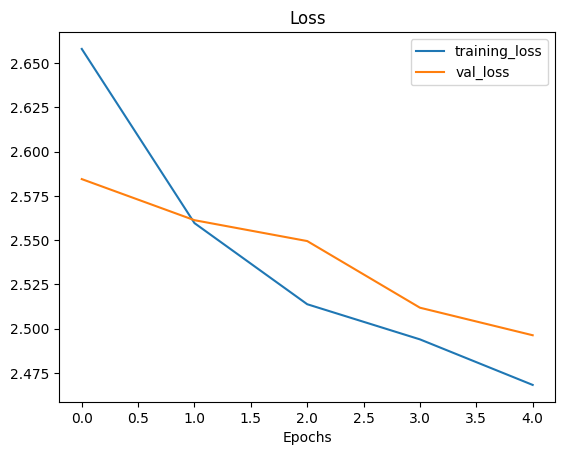

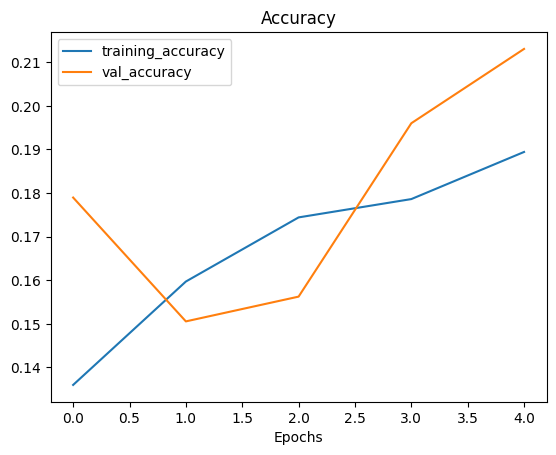

In [18]:
plot_loss_curves(history1)

In [19]:
model_0.evaluate(test_data)

45/45 [==============================] - 11s 236ms/step - loss: 2.4755 - accuracy: 0.2099


[2.4755284786224365, 0.20986796915531158]

In [20]:
#import data from directories and turn it into batches

train_data= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               image_size=(224, 224), # convert all images to be 224 x 224
                                               label_mode="categorical", # type of problem we're working on
                                               seed=42)
test_data= tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                               batch_size=32, # number of images to process at a time
                                               image_size=(224, 224), # convert all images to be 224 x 224
                                               label_mode="categorical", # type of problem we're working on
                                               seed=42)

Found 3331 files belonging to 15 classes.
Found 1439 files belonging to 15 classes.


In [21]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
x=base_model(inputs,training=False)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

output=tf.keras.layers.Dense(15,activation="softmax")(x)
model_1=tf.keras.Model(inputs,output)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history2=model_1.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25*len(test_data)),
                    callbacks=[create_tensorboard_callback("food101","efficientnet_model_1")])

16705208/16705208 [==============================] - 2s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: food101/efficientnet_model_1/20240710-053243
Epoch 1/5
105/105 [==============================] - 26s 167ms/step - loss: 1.2889 - accuracy: 0.6746 - val_loss: 0.7072 - val_accuracy: 0.7955
Epoch 2/5
105/105 [==============================] - 15s 132ms/step - loss: 0.5127 - accuracy: 0.8895 - val_loss: 0.4842 - val_accuracy: 0.8580
Epoch 3/5
105/105 [==============================] - 15s 131ms/step - loss: 0.3578 - accuracy: 0.9267 - val_loss: 0.4183 - val_accuracy: 0.8750
Epoch 4/5
105/105 [==============================] - 15s 139ms/step - loss: 0.2811 - accuracy: 0.9436 - val_loss: 0.3613 - val_accuracy: 0.8920
Epoch 5/5
105/105 [==============================] - 15s 137ms/step - loss: 0.2300 - accuracy: 0.9529 - val_loss: 0.3191 - val_accuracy: 0.9062


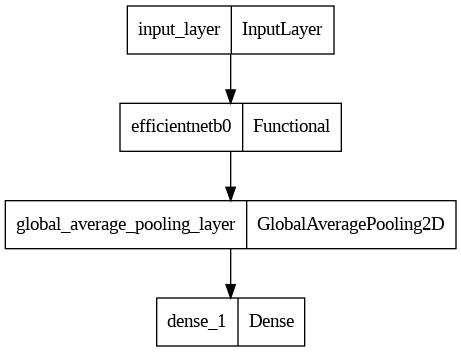

In [22]:
tf.keras.utils.plot_model(model_1)

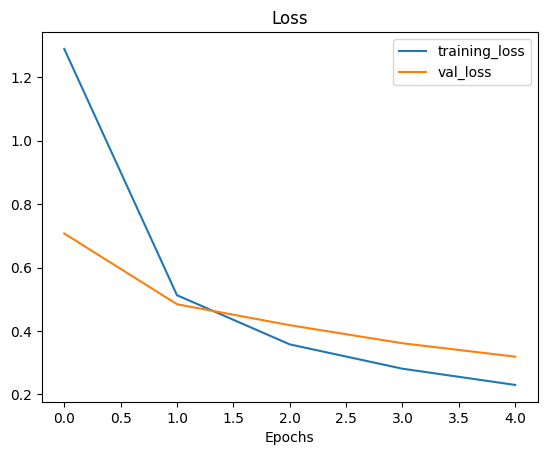

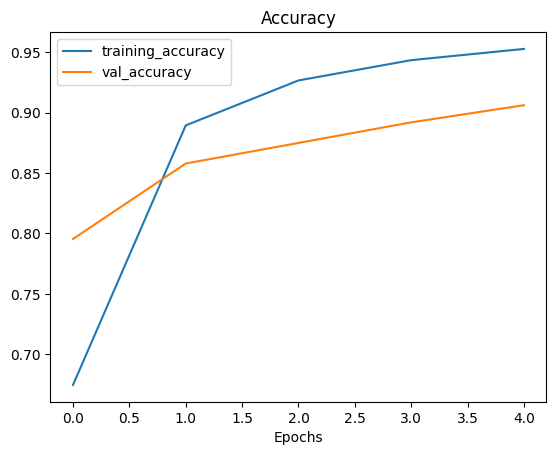

In [23]:
plot_loss_curves(history2)

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing

# NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name ="data_augmentation")

In [25]:
import matplotlib.pyplot as plt

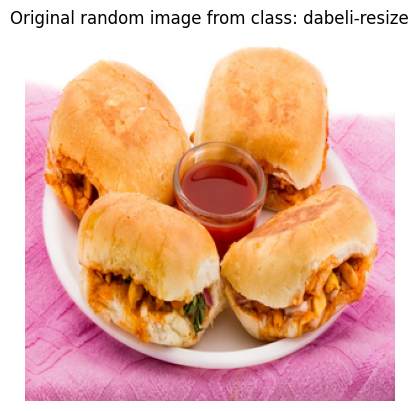

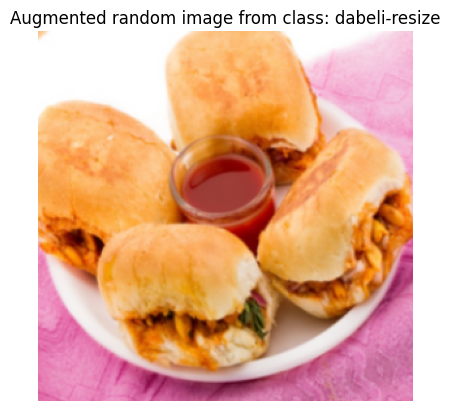

In [26]:
import random
import matplotlib.image as mpimg
target_class = random.choice(train_data.class_names) # choose a random class
target_dir = "/content/INDIAN_FOOD_DS/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [27]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(15, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_2 = keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3= model_2.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("food101","resnet_model2")])

24274472/24274472 [==============================] - 2s 0us/step
Saving TensorBoard log files to: food101/resnet_model2/20240710-053418
Epoch 1/5
105/105 [==============================] - 114s 999ms/step - loss: 1.6319 - accuracy: 0.5470 - val_loss: 0.9165 - val_accuracy: 0.7528
Epoch 2/5
105/105 [==============================] - 71s 671ms/step - loss: 0.8498 - accuracy: 0.7844 - val_loss: 0.6350 - val_accuracy: 0.8352
Epoch 3/5
105/105 [==============================] - 71s 666ms/step - loss: 0.6709 - accuracy: 0.8274 - val_loss: 0.5197 - val_accuracy: 0.8409
Epoch 4/5
105/105 [==============================] - 61s 575ms/step - loss: 0.5609 - accuracy: 0.8523 - val_loss: 0.4563 - val_accuracy: 0.8665
Epoch 5/5
105/105 [==============================] - 56s 527ms/step - loss: 0.4829 - accuracy: 0.8772 - val_loss: 0.4048 - val_accuracy: 0.8835


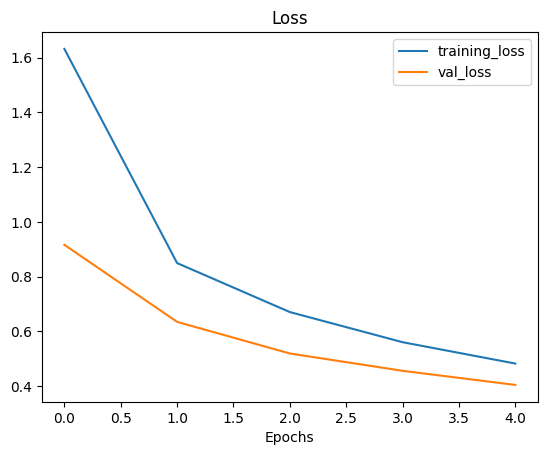

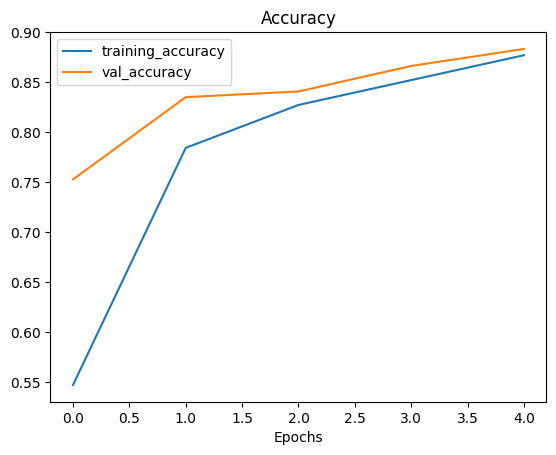

In [28]:
plot_loss_curves(history_3)

In [29]:
model_2.evaluate(test_data)

45/45 [==============================] - 6s 127ms/step - loss: 0.3812 - accuracy: 0.8951


[0.38116422295570374, 0.8950660228729248]

In [30]:
 #Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [31]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:
    """
    Create a model based on EfficientNetV2B0 with built-in data augmentation.

    Parameters:
    - input_shape (tuple): Expected shape of input images. Default is (224, 224, 3).
    - output_shape (int): Number of classes for the output layer. Default is 10.
    - learning_rate (float): Learning rate for the Adam optimizer. Default is 0.001.
    - training (bool): Whether the base model is trainable. Default is False.

    Returns:
    - tf.keras.Model: The compiled model with specified input and output settings.
    """

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)  # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=15, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile model
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model

# Create an instance of model_2 with our new function
model_3 = create_base_model()

In [32]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_3.fit(train_data,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation (quicker)
                                          callbacks=[create_tensorboard_callback("food101", "efficientnet_model_3"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: food101/efficientnet_model_3/20240710-054140
Epoch 1/5
105/105 [==============================] - ETA: 0s - loss: 1.5980 - accuracy: 0.5620
Epoch 1: val_loss improved from inf to 0.91609, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
105/105 [==============================] - 60s 490ms/step - loss: 1.5980 - accuracy: 0.5620 - val_loss: 0.9161 - val_accuracy: 0.7443
Epoch 2/5
105/105 [==============================] - ETA: 0s - loss: 0.8468 - accuracy: 0.7838
Epoch 2: val_loss improved from 0.91609 to 0.64393, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
105/105 [==============================] - 45s 421ms/step - loss: 0.8468 - accuracy: 0.7838 - val_loss: 0.6439 - val_accuracy: 0.8352
Epoch 3/5
105/105 [==============================] - ETA: 0s - loss: 0.6419 - accuracy: 0.8406
Epoch 3: val_loss improved from 0.64393 to 0.52952, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
105/105

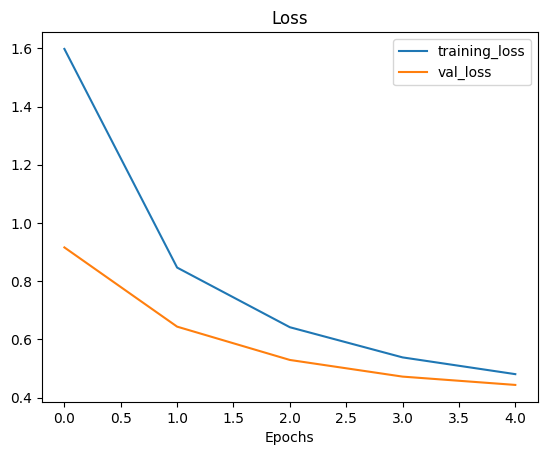

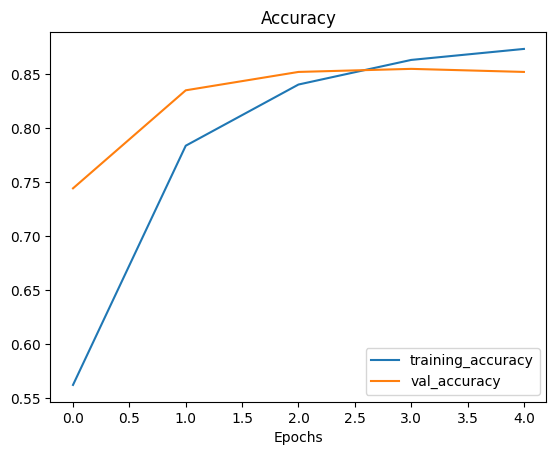

In [33]:
plot_loss_curves(history_10_percent_data_aug)

In [34]:
model_3.evaluate(test_data)

45/45 [==============================] - 5s 95ms/step - loss: 0.3801 - accuracy: 0.8930


[0.38009947538375854, 0.892981231212616]

In [35]:
# Layers in loaded model
model_3.layers

In [36]:
model_3_baselayer=model_3.layers[2]
model_3_baselayer


In [37]:
for layer_number, layer in enumerate(model_3_baselayer.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [38]:
# Make all the layers in model_2_base_model trainable
model_3_baselayer.trainable = True

# Freeze all layers except for the last 10
for layer in model_3_baselayer.layers[:-10]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustments to a model)
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [39]:
#Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_finetuned= model_3.fit(train_data,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("food101", "resnetmodel3")])

Saving TensorBoard log files to: food101/resnetmodel3/20240710-054535
Epoch 5/10
105/105 [==============================] - 52s 393ms/step - loss: 0.3578 - accuracy: 0.8922 - val_loss: 0.3359 - val_accuracy: 0.8807
Epoch 6/10
105/105 [==============================] - 41s 381ms/step - loss: 0.3103 - accuracy: 0.9027 - val_loss: 0.3651 - val_accuracy: 0.8750
Epoch 7/10
105/105 [==============================] - 35s 323ms/step - loss: 0.2748 - accuracy: 0.9111 - val_loss: 0.2923 - val_accuracy: 0.8977
Epoch 8/10
105/105 [==============================] - 32s 302ms/step - loss: 0.2591 - accuracy: 0.9168 - val_loss: 0.2939 - val_accuracy: 0.9006
Epoch 9/10
105/105 [==============================] - 31s 285ms/step - loss: 0.2394 - accuracy: 0.9292 - val_loss: 0.2926 - val_accuracy: 0.8977
Epoch 10/10
105/105 [==============================] - 30s 277ms/step - loss: 0.2172 - accuracy: 0.9328 - val_loss: 0.3100 - val_accuracy: 0.8920


In [40]:
model_3.evaluate(test_data)

45/45 [==============================] - 7s 128ms/step - loss: 0.2383 - accuracy: 0.9194


[0.23826782405376434, 0.919388473033905]

In [41]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.561993420124054, 0.7838487029075623, 0.840588390827179, 0.863404393196106, 0.8736115097999573, 0.8922245502471924, 0.9027318954467773, 0.9111378192901611, 0.9168418049812317, 0.929150402545929, 0.9327529072761536]


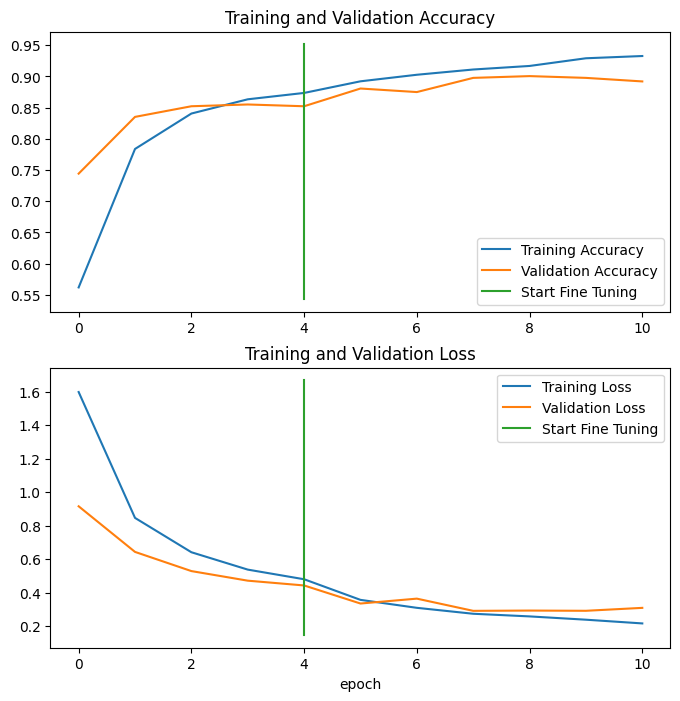

In [42]:
compare_historys(history_10_percent_data_aug, history_finetuned, initial_epochs=5)

#saving the trained model

In [43]:
model_save_path = '/content/simple_model.h5'

In [44]:
model_3.save(model_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
# Check if the file exists
import os
print("File exists:", os.path.exists(model_save_path))

File exists: True


In [46]:
import h5py

try:
    with h5py.File(model_save_path, 'r') as f:
        print("File is a valid HDF5 file.")
except OSError as e:
    print("Error: File is not a valid HDF5 file.")

File is a valid HDF5 file.


In [47]:
pred_probs=model_3.predict(test_data,verbose=1)

45/45 [==============================] - 7s 98ms/step


In [48]:
len(pred_probs)

1439

In [49]:
# What's the shape of our predictions?
pred_probs.shape

(1439, 15)

In [50]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 15
What prediction probability sample 0 looks like:
 [2.5630015e-06 8.5498876e-05 2.0217152e-07 7.5121029e-06 2.4676509e-04
 3.8318609e-05 2.9831679e-06 3.7120051e-05 1.2691808e-03 3.7165326e-05
 6.8579402e-06 2.9011400e-05 1.0537851e-03 9.9706972e-01 1.1331849e-04]
The class with the highest predicted probability by the model for sample 0: 13


In [51]:
# How do they look?
pred_probs[:10]

array([[2.56300154e-06, 8.54988757e-05, 2.02171520e-07, 7.51210291e-06,
        2.46765092e-04, 3.83186089e-05, 2.98316786e-06, 3.71200513e-05,
        1.26918079e-03, 3.71653259e-05, 6.85794021e-06, 2.90114003e-05,
        1.05378509e-03, 9.97069716e-01, 1.13318492e-04],
       [4.04975076e-08, 1.77086804e-06, 1.11789431e-08, 2.17590554e-07,
        9.99989271e-01, 6.43242174e-07, 3.14722506e-08, 2.70430093e-07,
        3.45890157e-06, 1.76357389e-06, 1.97160670e-08, 1.57948065e-07,
        3.73053666e-07, 1.98148587e-06, 6.22585317e-09],
       [7.01530022e-04, 8.26790767e-07, 1.49111307e-04, 3.91106540e-03,
        1.53688583e-04, 6.63774146e-04, 1.04161363e-05, 2.11374700e-05,
        2.94119800e-05, 3.98493012e-06, 8.65093241e-08, 6.57077521e-07,
        5.16153477e-07, 6.68094290e-05, 9.94286954e-01],
       [1.15749936e-05, 4.32800334e-06, 3.26342935e-08, 4.08758160e-06,
        9.89994347e-01, 1.68543720e-05, 6.83931319e-07, 1.02922450e-05,
        2.22318213e-05, 3.41937121e-0

In [52]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([13,  4, 14,  4, 14,  3,  4,  1, 13,  1])

In [53]:
# Note: This might take a minute or so due to unravelling 790 batches
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10]

[4, 7, 13, 10, 8, 4, 10, 3, 2, 8]

In [54]:
# How many labels are there? (should be the same as how many prediction probabilities we have)
len(y_labels)

1439

In [55]:
# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.0945100764419736

In [56]:
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [57]:
# Get the class names
class_names = test_data.class_names
class_names[:10]

['Biryani-resize',
 'Chole-Bhature-Resized',
 'Jalebi-Resize',
 'Kofta-Resized',
 'Naan-Resized',
 'Paneer-Tikka-resized',
 'Pani-Puri-resize',
 'Pav-Bhaji-Resized',
 'Vadapav-Resized',
 'dabeli-resize']

In [58]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.05      0.04      0.05        69
           1       0.07      0.07      0.07        98
           2       0.10      0.10      0.10        92
           3       0.14      0.15      0.15       201
           4       0.06      0.07      0.07       106
           5       0.11      0.10      0.10        78
           6       0.09      0.09      0.09        54
           7       0.03      0.03      0.03        91
           8       0.18      0.19      0.19       161
           9       0.00      0.00      0.00        66
          10       0.07      0.08      0.07        79
          11       0.10      0.09      0.10        75
          12       0.02      0.02      0.02        52
          13       0.09      0.09      0.09       103
          14       0.08      0.08      0.08       114

    accuracy                           0.09      1439
   macro avg       0.08      0.08      0.08      1439
weighted avg       0.09   

In [60]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 27ms/step


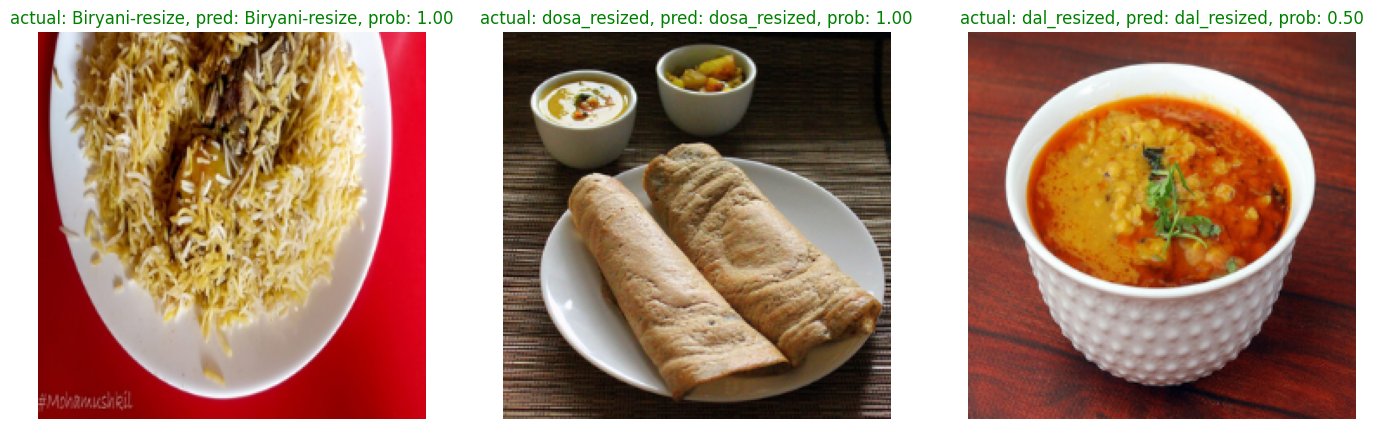

In [61]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir +"/"+ class_name + "/" + filename
  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model_3.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

In [62]:
def predict_image(model,img):
  img = load_and_prep_image(img, scale=False) # load in target image and turn it into tensor
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class label
  # Plot the image with appropriate annotations
  plt.figure()
  plt.imshow(img/255.) # imshow() requires float inputs to be normalized
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)

In [63]:
!wget "https://www.dwarakaorganic.com/wp-content/uploads/2021/03/Daal-Fry-1-1024x683.jpg"

--2024-07-10 05:50:47--  https://www.dwarakaorganic.com/wp-content/uploads/2021/03/Daal-Fry-1-1024x683.jpg
Resolving www.dwarakaorganic.com (www.dwarakaorganic.com)... 3.20.98.128
Connecting to www.dwarakaorganic.com (www.dwarakaorganic.com)|3.20.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38180 (37K) [image/jpeg]
Saving to: ‘Daal-Fry-1-1024x683.jpg’

Daal-Fry-1-1024x683 100%[===================>]  37.29K   169KB/s    in 0.2s    

2024-07-10 05:50:48 (169 KB/s) - ‘Daal-Fry-1-1024x683.jpg’ saved [38180/38180]



1/1 [==============================] - 0s 26ms/step


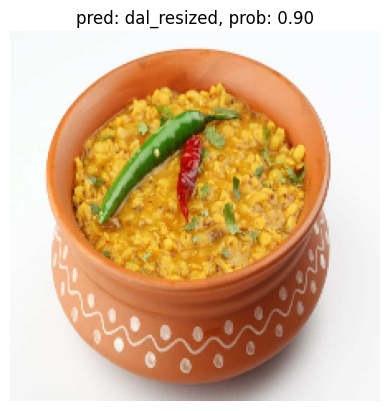

In [64]:
predict_image(model_3,'Daal-Fry-1-1024x683.jpg')

In [65]:
!wget "https://www.wikihow.com/images/a/a8/Make-Hyderabadi-Vegetable-Biryani-Step-15.jpg"

--2024-07-10 05:50:49--  https://www.wikihow.com/images/a/a8/Make-Hyderabadi-Vegetable-Biryani-Step-15.jpg
Resolving www.wikihow.com (www.wikihow.com)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to www.wikihow.com (www.wikihow.com)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5520296 (5.3M) [image/jpeg]
Saving to: ‘Make-Hyderabadi-Vegetable-Biryani-Step-15.jpg’

Make-Hyderabadi-Veg 100%[===================>]   5.26M  --.-KB/s    in 0.02s   

2024-07-10 05:50:49 (258 MB/s) - ‘Make-Hyderabadi-Vegetable-Biryani-Step-15.jpg’ saved [5520296/5520296]



1/1 [==============================] - 0s 26ms/step


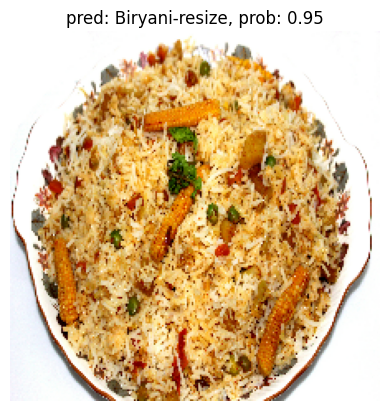

In [66]:
predict_image(model_3,'Make-Hyderabadi-Vegetable-Biryani-Step-15.jpg')

In [67]:
import tensorflow as tf
model_save_path = '/content/simple_model.h5'
new_model = tf.keras.models.load_model(model_save_path)

In [68]:
import h5py

try:
    with h5py.File(model_save_path, 'r') as f:
        print("File is a valid HDF5 file.")
except OSError as e:
    print("Error: File is not a valid HDF5 file.")


File is a valid HDF5 file.


# Image Classification Web App with Streamlit

Next comming cells  demonstrates how to create a web application for image classification using Streamlit and TensorFlow. The application allows users to upload an image, preprocess it, and get predictions from a pre-trained model. The notebook also uses ngrok to create a public URL for the Streamlit app.

## Step-by-Step Guide

1. **Load and Preprocess the Image**: The `img_classification.py` script contains functions to load and preprocess images to be compatible with our model.
2. **Build the Streamlit App**: The `app.py` script sets up the Streamlit interface for users to upload images and view predictions.
3. **Expose the App to the Internet**: The ngrok service is used to make the Streamlit app publicly accessible.

Let's dive into the code!

---

### Step 1: Image Preprocessing
We start by defining a function to load and preprocess the image.


In [69]:
%%writefile img_classification.py

import tensorflow as tf
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224, scale=True):
   """
    Reads in an image from filename, turns it into a tensor and reshapes it to (224, 224, 3).

    Parameters
    ----------
    filename (str): string filename of target image
    img_shape (int): size to resize target image to, default is 224
    scale (bool): whether to scale pixel values to range(0, 1), default is True

    Returns
    -------
    Tensor: Image tensor of shape (img_shape, img_shape, 3)
    """
  # Convert the numpy array to a tensor
  img = tf.convert_to_tensor(filename,dtype=tf.float32)

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale the image pixel values to the range (0, 1) if scale is True
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

 # List of class names for prediction
class_names = [
    'Biryani', 'Chole-Bhature', 'Jalebi', 'Kofta', 'Naan',
    'Paneer-Tikka', 'Pani-Puri', 'Pav-Bhaji', 'Vadapav',
    'Dabeli', 'Dal', 'Dhokla', 'Dosa', 'Kathi', 'Pakora'
]
def predict_data(model, filename, class_names):
  """
    Imports an image located at filename, makes a prediction on it with a trained model,
    and returns the predicted class.

    Parameters
    ----------
    model: Trained TensorFlow/Keras model
    filename (str): Path to the image file
    class_names (list): List of class names corresponding to model output

    Returns
    -------
    str: Predicted class name
    """
  # Load and preprocess the image
  img = load_and_prep_image(filename)

  # Make a prediction on the preprocessed image
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]

  # Get the predicted class with the highest probability
  pred_class = class_names[pred_prob.argmax()]

  return pred_class



Writing img_classification.py


### Step 2: Build the Streamlit App

Next, we set up our Streamlit application. This app will allow users to upload an image and receive a prediction from the pre-trained model.

In [70]:
%%writefile app.py
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
import streamlit as st
from img_classification import load_and_prep_image,predict_data
# Load pre-trained model
model_1 = tf.keras.models.load_model('/content/simple_model.h5')

st.title("Your Streamlit App for Machine Learning Predictions")
st.write("Upload an image and get the predicted class.")

# Define class names
class_names = ['Biryani', 'Chole-Bhature', 'Jalebi', 'Kofta', 'Naan', 'Paneer-Tikka', 'Pani-Puri', 'Pav-Bhaji', 'Vadapav', 'Dabeli', 'Dal', 'Dhokla', 'Dosa', 'Kathi', 'Pakora']

# File uploader for user to upload an image
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    try:
      # Load and preprocess the image
      data = Image.open(uploaded_file)
      st.image(data, caption='Uploaded pic.', use_column_width=True)

      st.write("")
      st.write("Classifying...")

      img=load_and_prep_image(data)
      predicted_class = predict_data(model_1, img, class_name)


      # Display results
      st.success("Prediction successful!")
      st.write(f"Predicted Class: {predicted_class}")

    except Exception as e:
       st.error(f"An error occurred during prediction: {e}")

Writing app.py


### Step 3: Install Required Packages

Before we start building our image classification web app, we need to install a few necessary packages. The `streamlit` package will allow us to create the web interface, and the `pyngrok` package will help us expose our Streamlit app to the internet.

Run the following commands to install these packages:


In [71]:
# Install Streamlit, a framework to create web apps with minimal effort
!pip -q install streamlit

# Install pyngrok, a package to create public URLs for our web app
!pip -q install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00
